In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("financials2.csv")
df

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42


In [5]:
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62


### Data Cleaning and Preparation

In [6]:
columns = ['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book']

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')
df

,symbol,name,sector,price,price_earnings,dividend_yield,earnings_share,52_week_low,52_week_high,market_cap,ebitda,price_sales,price_book
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42


In [8]:
df.isnull().sum()

symbol            0
name              0
sector            0
price             0
price_earnings    2
dividend_yield    0
earnings_share    0
52_week_low       0
52_week_high      0
market_cap        0
ebitda            0
price_sales       0
price_book        8
dtype: int64

In [9]:
df.price_earnings.fillna(0, inplace=True)
df.price_book.fillna(0, inplace=True)

In [10]:
df.isnull().sum()

symbol            0
name              0
sector            0
price             0
price_earnings    0
dividend_yield    0
earnings_share    0
52_week_low       0
52_week_high      0
market_cap        0
ebitda            0
price_sales       0
price_book        0
dtype: int64

In [44]:
dict(df.iloc[1, :10])

{'symbol': 'AOS',
 'name': 'A.O. Smith Corp',
 'sector': 'Industrials',
 'price': 60.24,
 'price_earnings': 27.76,
 'dividend_yield': 1.1479592,
 'earnings_share': 1.7,
 '52_week_low': 68.39,
 '52_week_high': 48.925,
 'market_cap': 10783419933}

In [12]:
df.dtypes

symbol             object
name               object
sector             object
price             float64
price_earnings    float64
dividend_yield    float64
earnings_share    float64
52_week_low       float64
52_week_high      float64
market_cap          int64
ebitda            float64
price_sales       float64
price_book        float64
dtype: object

In [13]:
categorical = ['symbol', 'name', 'sector']
numerical = ['price', 'price_earnings', 'dividend_yield', 'earnings_share', '52_week_low', '52_week_high', 'market_cap', 'ebitda', 'price_sales', 'price_book']

### Splitting the Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.price.values
y_test = df_test.price.values
y_val = df_val.price.values

In [18]:
del df_train['price']
del df_val['price']
del df_test['price']

In [19]:
y_train

array([ 209.09,  133.57,   55.31,  174.51,   50.71,   46.25,  179.11,
         70.55,  322.62,   29.1 ,   59.11,  112.3 ,  114.58,   45.88,
        223.17,   27.91,   70.55,   16.8 ,  198.79,  136.89,  189.27,
         54.4 ,  110.15,  158.97,  381.87,   56.27,   42.19,   25.85,
        149.32,  601.  ,   65.98,   76.06,   38.24,   21.62,  178.61,
        241.06,   60.24,   12.82,   75.16,  101.36,   56.01,   53.29,
         31.1 ,   70.85,   62.49,  152.5 ,   92.74,   83.25,   65.05,
        111.69,   16.2 ,  105.18,  109.63,  101.35,   91.8 , 1001.52,
        208.42,   56.2 ,  114.26,  180.49,   98.96,  131.46,   47.23,
         62.72,   78.75,   61.13,   53.24,  262.37,   55.26,  127.48,
         46.73,   31.17,   80.87,   52.26,   40.82,  149.38,   24.13,
         52.15,   56.85,  387.65,   54.73,   28.56,   98.54,  133.05,
         32.64,  152.18,   46.84,   26.38,   41.02,   38.86,   23.86,
         87.6 ,   85.16,   96.2 ,   36.82,   35.49,   35.6 ,   64.87,
         47.54,  173

### Mutual Info Score

In [20]:
from sklearn.metrics import mutual_info_score

def mutual_info(series):
    return mutual_info_score(series, df_full_train.price)
info = df_full_train[numerical].apply(mutual_info)
info.sort_values(ascending=False)


/home/itssshikhar/.local/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/itssshikhar/.local/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/itssshikhar/.local/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/itssshikhar/.local/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous valu

price             5.984258
market_cap        5.984258
price_sales       5.984258
52_week_low       5.970532
52_week_high      5.963669
price_earnings    5.858977
earnings_share    5.745286
price_book        5.718222
ebitda            5.553385
dividend_yield    5.143111
dtype: float64

### Using Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [22]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [23]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_val, y_val))

0.9373980580653559


In [25]:
y_pred = model.predict(X_val)
y_pred

array([ 36.39388512,  71.94588527,  49.02907361,  82.98821632,
       205.61081213,  39.96325345,  88.73159595,  40.81071685,
       135.67079223,  71.71305237,  63.72145187,  33.18296944,
       135.6583115 ,  61.86835941,  16.91749732,  75.01101113,
       188.19432239, 140.38725783, 114.75012871, 148.52126176,
       123.36203566,  49.03253931,  89.52426786,  74.88146685,
        68.65948921,  33.10285859,  32.86660067, 306.16080387,
        45.20560301,  11.53136754, 106.18877115,  19.10633696,
        97.83609994, 250.03367736,  47.21018905,  61.87601769,
        29.64546383,  16.59960933, 145.57007785, 101.01397048,
       102.83966929,  54.23729762,  98.35623632, 100.02065657,
        73.76858635, 136.00068994, 118.45231722,  18.58189176,
        17.7237046 , 219.72300538, 111.14846793,  63.80601278,
        73.60405237,  48.84108349,  55.99876797,  17.28444169,
        19.39433518,  99.12132746,  20.73219957,  61.50616035,
       309.82642821,  33.34262648,  74.79183787, 225.86

### Using Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
regressor = DecisionTreeRegressor(random_state = 0)

In [28]:
regressor.fit(X_train, y_train)
print(regressor.score(X_val, y_val))

0.923617865232924


In [29]:
y_pred = regressor.predict(X_val)

print("Predicted price", y_pred)

Predicted price [ 29.8   79.31  46.84  80.52 220.71  32.88  95.27  38.77 149.38  68.47
  70.55  40.82 123.03  54.73  16.8   76.06 185.16 156.15 114.   156.15
 131.46  47.23  92.44  76.3   71.87  41.02  31.1  216.46  35.34  16.8
 119.08  25.85  96.2  223.17  35.34  56.85  27.57  24.66 136.89 101.35
 108.25  54.73  95.27 108.25  76.3  137.25 133.31  11.22  11.22 209.09
 114.    64.87  80.52  44.55  62.72  15.1   16.8   95.27  12.82  62.49
 322.62  41.02  73.92 216.46 149.32 119.08  72.02  84.44  74.21  24.66
  19.57  14.01 216.46  60.34  96.2   38.77  84.44  84.44  95.01 381.87
 149.32  31.1   38.77  38.   164.95  47.54 116.93  78.75 155.15  62.69
  90.47  46.84  35.34  11.22  19.57  46.84  91.8  246.35 262.37  56.85
  71.91]


### Visualizing the Decision Tree

In [30]:
from sklearn.tree import export_graphviz 
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(regressor, out_file=None, 
                                feature_names =list(dv.get_feature_names_out()),  
                                class_names=True,
                                filled=True)

graph = graphviz.Source(dot_data, format="svg") 
graph
graph.render("decision_tree_graphviz")

'decision_tree_graphviz.svg'

### Accuracy of Model

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [32]:
price_logs = np.log1p(df.price)

<Axes: xlabel='price', ylabel='Count'>

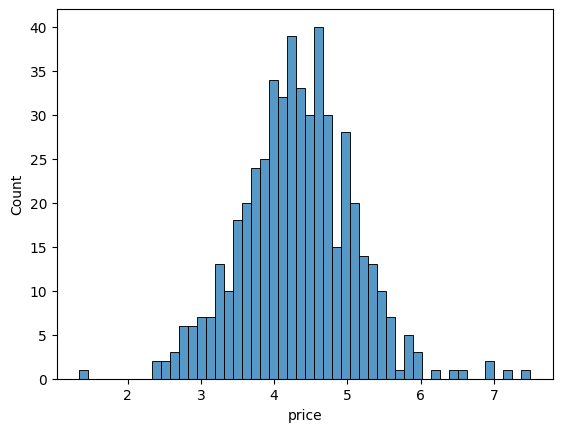

In [33]:
sns.histplot(price_logs, bins=50)

<Axes: ylabel='Count'>

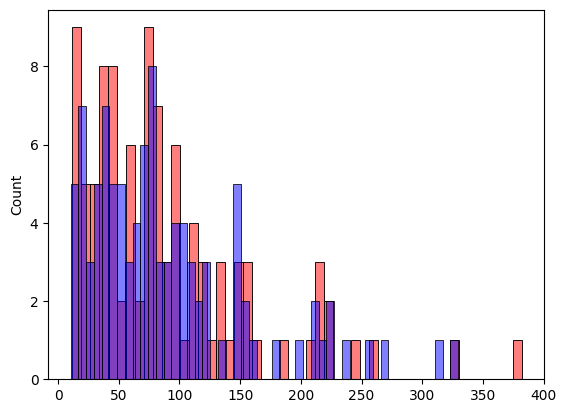

In [34]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

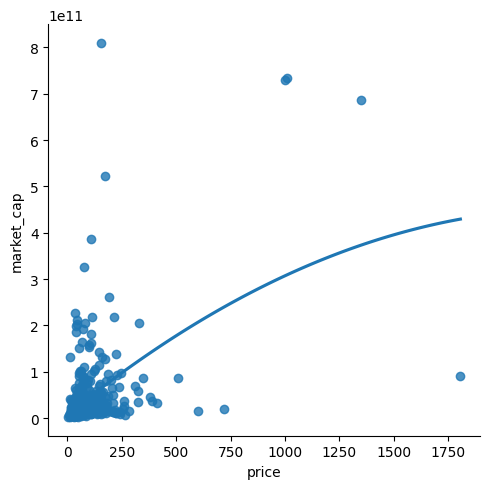

In [35]:
sns.lmplot(x ="price", y ="market_cap", data = df_full_train, order = 2, ci = None)
plt.show()

In [36]:
mean_squared_error(y_val, y_pred, squared=False)

18.753003244629095

### Saving and Loading the Model

In [40]:
import pickle

In [42]:
output_file = 'model.bin'

In [43]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

print(f'the model is saved to {output_file}')

the model is saved to model.bin
